<a href="https://colab.research.google.com/github/JulioSan02/UNCC/blob/4105/JS_4105_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab_Notebooks/Data/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [45]:
housing.shape

(545, 13)

In [46]:
# Checking Null values
housing.isnull().sum()*100/housing.shape[0]
# There are no NULL values in the dataset, hence it is clean.

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [47]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Defining the map function
def data_map(x):
    return x.map({'yes': 1, 'no': 0, 'unfurnished': 0, 'semi-furnished': 0.5, 'furnished': 1})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(data_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,1.0
1,12250000,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0,1.0
2,12250000,9960,3,2,2,1.0,0.0,1.0,0.0,0.0,2,1.0,0.5
3,12215000,7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,1.0,1.0
4,11410000,7420,4,1,2,1.0,1.0,1.0,0.0,1.0,2,0.0,1.0


In [48]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
train, test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,8645000,8050,3,1,1,1.0,1.0,1.0,0.0,1.0,1,0.0,1.0
41,7840000,6360,3,2,4,1.0,0.0,0.0,0.0,1.0,0,1.0,1.0
91,6419000,6750,2,1,1,1.0,1.0,1.0,0.0,0.0,2,1.0,1.0
118,5950000,6420,3,1,1,1.0,0.0,1.0,0.0,1.0,0,1.0,1.0
472,3010000,3630,4,1,2,1.0,0.0,0.0,0.0,0.0,3,0.0,0.5


In [49]:
test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
265,4403000,2880,3,1,2,1.0,0.0,0.0,0.0,0.0,0,1.0,0.5
54,7350000,6000,3,2,2,1.0,1.0,0.0,0.0,1.0,1,0.0,0.5
171,5250000,10269,3,1,1,1.0,0.0,0.0,0.0,0.0,1,1.0,0.5
244,4550000,5320,3,1,2,1.0,1.0,1.0,0.0,0.0,0,1.0,0.5
268,4382000,4950,4,1,2,1.0,0.0,0.0,0.0,1.0,0,0.0,0.5


In [50]:
def gradient_descent(train, test, price_train, price_test, alpha, theta, iterations):
    train_losses = []
    val_losses = []

    for iteration in range(iterations):
        gradients = 2/(len(train)) * train.T.dot(train.dot(theta) - price_train)
        theta -= alpha * gradients

        train_loss = (1/len(train)) * np.sum(np.square(train.dot(theta) - price_train))
        val_loss = (1/len(test)) * np.sum(np.square(test.dot(theta) - price_test))

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return train_losses, val_losses

[8645000. 7840000. 6419000. 5950000. 3010000.]
[4403000. 7350000. 5250000. 4550000. 4382000.]
Length of training set =  436
Length of test set =  109

 The final theta values for the linear model are the following [8.64439246e-01 8.61911801e+02 3.15030734e+00 1.78128987e+00
 2.71025027e+00 6.85780625e-01]




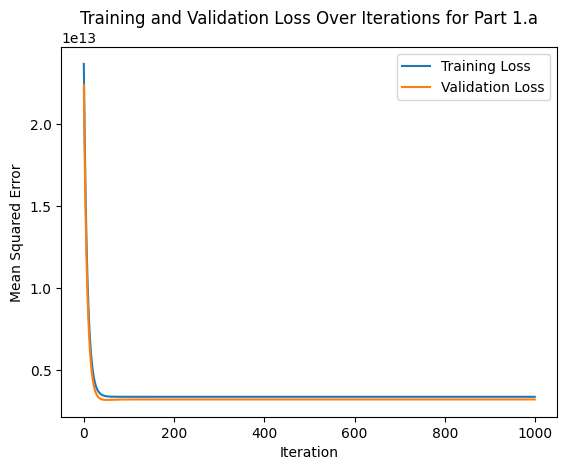

In [51]:
# Problem 1.a + b)

# initial values
price_train = train.values[:, 0]
print(price_train[:5])
price_test = test.values[:, 0]
print(price_test[:5])

train_len = len(price_train)  # Number of training examples for training set
print('Length of training set = ', train_len)
test_len = len(price_test)  # Number of training examples for test set
print('Length of test set = ', test_len)

vars_1a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
vars_1a_train = np.c_[np.ones((train_len, 1)), train[vars_1a]]
vars_1a_test = np.c_[np.ones((test_len, 1)), test[vars_1a]]

vars_1b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
vars_1b_train = np.c_[np.ones((train_len, 1)), train[vars_1b]]
vars_1b_test = np.c_[np.ones((test_len, 1)), test[vars_1b]]

# Train a simple linear regression model using gradient descent
alpha = 0.000000001
iterations = 1000

theta_1a = np.zeros(6)
theta_1b = np.zeros(12)

# Gradient descent for part 1.a
train_losses, val_losses = gradient_descent(vars_1a_train, vars_1a_test, price_train, price_test, alpha, theta_1a, iterations)

# Linear model for part 1.a
print('\n The final theta values for the linear model are the following', theta_1a)
print('\n')

# 4. Plot the training and validation loss after each iteration for part 1.a
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations for Part 1.a")
plt.show()


 The final theta values for the linear model are the following [8.64439101e-01 8.61911599e+02 3.15030690e+00 1.78128967e+00
 2.71024995e+00 7.48158660e-01 3.07279812e-01 4.84279948e-01
 1.42885944e-01 6.63340924e-01 6.85780548e-01 3.32226531e-01]




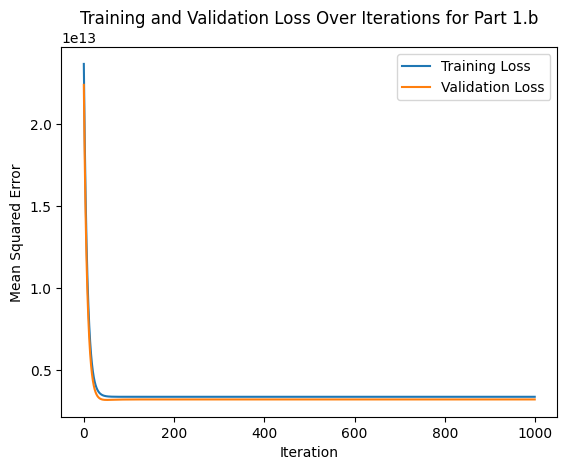

In [52]:
# Gradient descent for part 1.b
train_losses, val_losses = gradient_descent(vars_1b_train, vars_1b_test, price_train, price_test, alpha, theta_1b, iterations)

# Linear model for part 1.b
print('\n The final theta values for the linear model are the following', theta_1b)
print('\n')

# 4. Plot the training and validation loss after each iteration for part 1.b
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations for Part 1.b")
plt.show()

In [53]:
# Problem 2.a) - Normalized Inputs

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler_norm = MinMaxScaler()
scaler_stand = StandardScaler()

# Apply MinMax scaler to the training set columns for part 1.a) except the 'yes-no' and 'price' columns
train_norm_a = train
train_norm_a[vars_1a] = scaler_norm.fit_transform(train_norm_a[vars_1a])
train_norm_a.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,8645000,0.432609,0.4,0.000000,0.000000,1.0,1.0,1.0,0.0,1.0,0.333333,0.0,1.0
41,7840000,0.314954,0.4,0.333333,1.000000,1.0,0.0,0.0,0.0,1.0,0.000000,1.0,1.0
91,6419000,0.342105,0.2,0.000000,0.000000,1.0,1.0,1.0,0.0,0.0,0.666667,1.0,1.0
118,5950000,0.319131,0.4,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.000000,1.0,1.0
472,3010000,0.124896,0.6,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.5


In [54]:
# Apply MinMax scaler to the testing set columns for part 1.a) except the 'yes-no' and 'price' columns
test_norm_a = test
test_norm_a[vars_1a] = scaler_norm.fit_transform(test_norm_a[vars_1a])
test_norm_a.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
265,4403000,0.088172,0.333333,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.5
54,7350000,0.311828,0.333333,0.5,0.333333,1.0,1.0,0.0,0.0,1.0,0.333333,0.0,0.5
171,5250000,0.617849,0.333333,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.333333,1.0,0.5
244,4550000,0.263082,0.333333,0.0,0.333333,1.0,1.0,1.0,0.0,0.0,0.000000,1.0,0.5
268,4382000,0.236559,0.666667,0.0,0.333333,1.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.5


[[1.         0.4326093  0.4        0.         0.         0.33333333]
 [1.         0.31495405 0.4        0.33333333 1.         0.        ]
 [1.         0.34210526 0.2        0.         0.         0.66666667]
 [1.         0.31913116 0.4        0.         0.         0.        ]
 [1.         0.12489557 0.6        0.         0.33333333 1.        ]]

 The final theta values for the linear model are the following [3022831.12000227 1632027.16515921 1439985.55973345 1276290.6054386
 1544970.75673438 1349879.93408192]




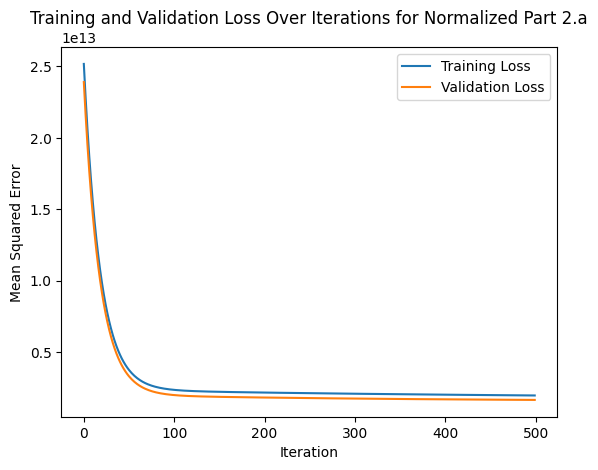

In [55]:
vars_2a_train_norm = np.c_[np.ones((train_len, 1)), train_norm_a[vars_1a]]
vars_2a_test_norm = np.c_[np.ones((test_len, 1)), test_norm_a[vars_1a]]

theta_2a_n = np.zeros(6)

iterations_2a_n = 500
alpha_2a_n = 0.01

# Doing the gradient descent for normalized inputs from part 1.a
train_losses, val_losses = gradient_descent(vars_2a_train_norm, vars_2a_test_norm, price_train, price_test, alpha_2a_n, theta_2a_n, iterations_2a_n)

# Linear model
print('\n The final theta values for the linear model are the following', theta_2a_n)
print('\n')

# 4. Plot the training and validation loss after each iteration for normalized part 1.a
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations for Normalized Part 2.a")
plt.show()

In [56]:
# Problem 2.a) - Standardized Inputs

# Apply StandarScaler scaler to the training set columns for part 1.a) except the 'yes-no' and 'price' columns
train_stand_a = train
train_stand_a[vars_1a] = scaler_stand.fit_transform(train_stand_a[vars_1a])
train_stand_a.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,8645000,1.351873,0.078679,-0.579897,-0.929023,1.0,1.0,1.0,0.0,1.0,0.311484,0.0,1.0
41,7840000,0.565326,0.078679,1.410929,2.474792,1.0,0.0,0.0,0.0,1.0,-0.849261,1.0,1.0
91,6419000,0.746837,-1.293483,-0.579897,-0.929023,1.0,1.0,1.0,0.0,0.0,1.472229,1.0,1.0
118,5950000,0.593251,0.078679,-0.579897,-0.929023,1.0,0.0,1.0,0.0,1.0,-0.849261,1.0,1.0
472,3010000,-0.705249,1.450841,-0.579897,0.205582,1.0,0.0,0.0,0.0,0.0,2.632974,0.0,0.5


In [57]:
# Apply StandarScaler scaler to the testing set columns for part 1.a) except the 'yes-no' and 'price' columns
test_stand_a = test
test_stand_a[vars_1a] = scaler_stand.fit_transform(test_stand_a[vars_1a])
test_stand_a.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
265,4403000,-1.020953,-0.072023,-0.531775,0.308415,1.0,0.0,0.0,0.0,0.0,-0.643743,1.0,0.5
54,7350000,0.369177,-0.072023,1.466964,0.308415,1.0,1.0,0.0,0.0,1.0,0.545545,0.0,0.5
171,5250000,2.271249,-0.072023,-0.531775,-0.936669,1.0,0.0,0.0,0.0,0.0,0.545545,1.0,0.5
244,4550000,0.066200,-0.072023,-0.531775,0.308415,1.0,1.0,1.0,0.0,0.0,-0.643743,1.0,0.5
268,4382000,-0.098656,1.236396,-0.531775,0.308415,1.0,0.0,0.0,0.0,1.0,-0.643743,0.0,0.5


[[ 1.          1.35187274  0.07867901 -0.57989658 -0.92902305  0.31148433]
 [ 1.          0.56532627  0.07867901  1.41092949  2.4747925  -0.8492607 ]
 [ 1.          0.746837   -1.29348292 -0.57989658 -0.92902305  1.47222936]
 [ 1.          0.593251    0.07867901 -0.57989658 -0.92902305 -0.8492607 ]
 [ 1.         -0.7052488   1.45084094 -0.57989658  0.20558213  2.6329744 ]]

 The final theta values for the linear model are the following [4558396.03301323  696741.58608278  137248.36294419  612181.46494334
  436252.89510486  304798.06863671]




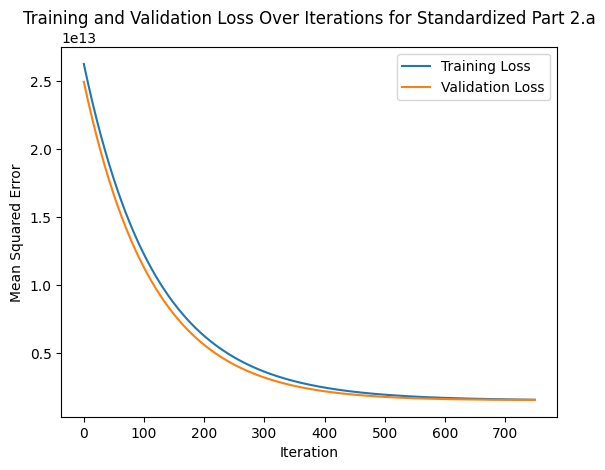

In [58]:
vars_2a_train_stand = np.c_[np.ones((train_len, 1)), train_stand_a[vars_1a]]
vars_2a_test_stand = np.c_[np.ones((test_len, 1)), test_stand_a[vars_1a]]

theta_2a_s = np.zeros(6)

iterations_2a_s = 750
alpha_2a_s = 0.002

# Doing the gradient descent for standardized inputs from part 1.a
train_losses, val_losses = gradient_descent(vars_2a_train_stand, vars_2a_test_stand, price_train, price_test, alpha_2a_s, theta_2a_s, iterations_2a_s)

# Linear model
print('\n The final theta values for the linear model are the following', theta_2a_s)
print('\n')

# 4. Plot the training and validation loss after each iteration for standardized part 1.a
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations for Standardized Part 2.a")
plt.show()


 The final theta values for the linear model are the following [1833620.98629984  549695.81268542  792774.61945706  355644.1439472
  695692.8823298  1587824.89629863  406426.28727544  633236.33633707
  168345.18794107  802862.80425736  586507.73423078  533578.36380351]




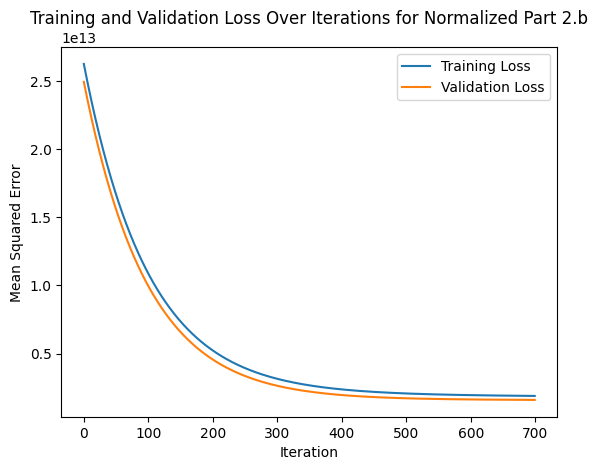

In [59]:
# Problem 2.b) - Normalized Inputs

# Apply MinMax scaler to the training set columns for part 1.b) except the 'yes-no' and 'price' columns
train_norm_b = train
train_norm_b[vars_1b] = scaler_norm.fit_transform(train_norm_b[vars_1b])
train_norm_b.head()

# Apply MinMax scaler to the testing set columns for part 1.b) except the 'yes-no' and 'price' columns
test_norm_b = test
test_norm_b[vars_1b] = scaler_norm.fit_transform(test_norm_b[vars_1b])
test_norm_b.head()

vars_2b_train_norm = np.c_[np.ones((train_len, 1)), train_norm_b[vars_1b]]
vars_2b_test_norm = np.c_[np.ones((test_len, 1)), test_norm_b[vars_1b]]

theta_2b_n = np.zeros(12)

iterations_2b_n = 700
alpha_2b_n = 0.001

# Doing the gradient descent for normalized inputs from part 1.b
train_losses, val_losses = gradient_descent(vars_2b_train_norm, vars_2b_test_norm, price_train, price_test, alpha_2b_n, theta_2b_n, iterations_2b_n)

# Linear model
print('\n The final theta values for the linear model are the following', theta_2b_n)
print('\n')

# 4. Plot the training and validation loss after each iteration for normalized part 1.b
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations for Normalized Part 2.b")
plt.show()


 The final theta values for the linear model are the following [4784543.15459545  528644.0960933    82026.37417363  574517.68349449
  360926.12377204  212952.97573019  150123.82420949  140054.76458731
  204424.19227809  401594.50112834  223879.52665415  256789.22611057]




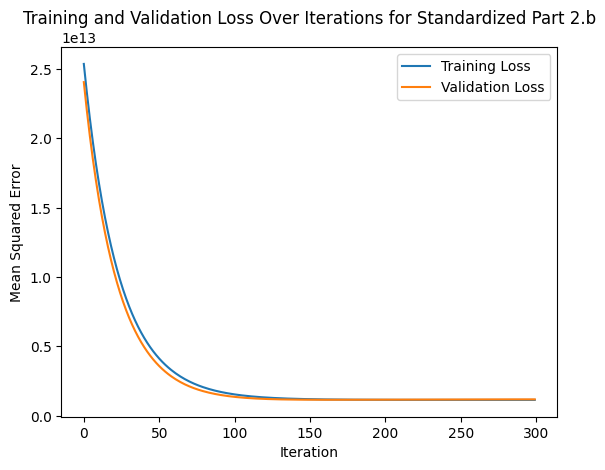

In [60]:
# Problem 2.b) - Standardized Inputs

# Apply StandarScaler scaler to the training set columns for part 1.b) except the 'yes-no' and 'price' columns
train_stand_b = train
train_stand_b[vars_1b] = scaler_stand.fit_transform(train_stand_b[vars_1b])
train_stand_b.head()

# Apply StandarScaler scaler to the testing set columns for part 1.b) except the 'yes-no' and 'price' columns
test_stand_b = test
test_stand_b[vars_1b] = scaler_stand.fit_transform(test_stand_b[vars_1b])
test_stand_b.head()

vars_2b_train_stand = np.c_[np.ones((train_len, 1)), train_stand_b[vars_1b]]
vars_2b_test_stand = np.c_[np.ones((test_len, 1)), test_stand_b[vars_1b]]

theta_2b_s = np.zeros(12)

iterations_2b_s = 300
alpha_2b_s = 0.01

# Doing the gradient descent for standardized inputs from part 1.b
train_losses, val_losses = gradient_descent(vars_2b_train_stand, vars_2b_test_stand, price_train, price_test, alpha_2b_s, theta_2b_s, iterations_2b_s)

# Linear model
print('\n The final theta values for the linear model are the following', theta_2b_s)
print('\n')

# 4. Plot the training and validation loss after each iteration for standardized part 1.b
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations for Standardized Part 2.b")
plt.show()

In [61]:
# Problem 3

def gradient_descent_penalty(train, test, price_train, price_test, alpha, theta, iterations, pen_par, inputs):
    train_losses = []
    val_losses = []

    for iteration in range(iterations):
        penalty = np.square(np.sum(theta))
        gradients = 2/(len(train)) * train.T.dot(train.dot(theta) - price_train)
        theta -= alpha * gradients
        train_loss = (1/len(train)) * (np.sum(np.square(train.dot(theta) - price_train)) + penalty)
        val_loss = (1/len(test)) * np.sum(np.square(test.dot(theta) - price_test))

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    print('\n', penalty)

    return train_losses, val_losses



 45481924220700.9

 The final theta values for the linear model are the following [4557035.55001984  696601.74687542  137346.72814823  612091.67901053
  436200.54183957  304804.20567682]




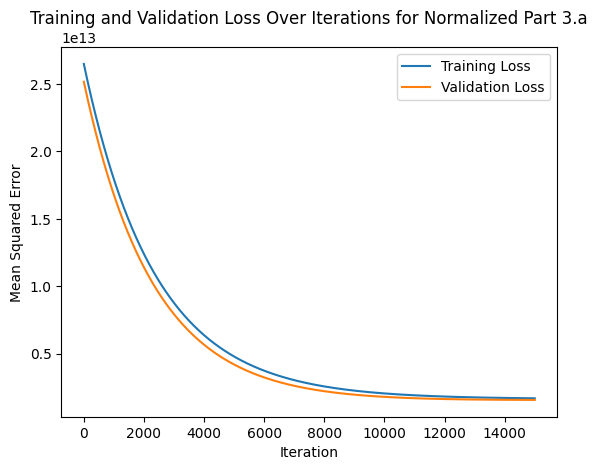

In [64]:
# Problem 3.a) - Normalized Inputs

vars_3a_train_norm = np.c_[np.ones((train_len, 1)), train_norm_a[vars_1a]]
vars_3a_test_norm = np.c_[np.ones((test_len, 1)), test_norm_a[vars_1a]]
#print(vars_3a_train_norm[:5])

theta_3a_n = np.zeros(6)

iterations_3a_n = 15000
alpha_3a_n = 0.0001
inputs_a = 5
pen_par = 0.000000001

# Doing the gradient descent for normalized inputs from part 1.a
train_losses_3an, val_losses_3an = gradient_descent_penalty(vars_3a_train_norm, vars_3a_test_norm, price_train, price_test, alpha_3a_n, theta_3a_n, iterations_3a_n, pen_par, inputs_a)

# Linear model
print('\n The final theta values for the linear model are the following', theta_3a_n)
print('\n')

# 4. Plot the training and validation loss after each iteration for normalized part 1.a
plt.plot(train_losses_3an, label="Training Loss")
plt.plot(val_losses_3an, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations for Normalized Part 3.a")
plt.show()


 45481924220700.9

 The final theta values for the linear model are the following [4557035.55001984  696601.74687542  137346.72814823  612091.67901053
  436200.54183957  304804.20567682]




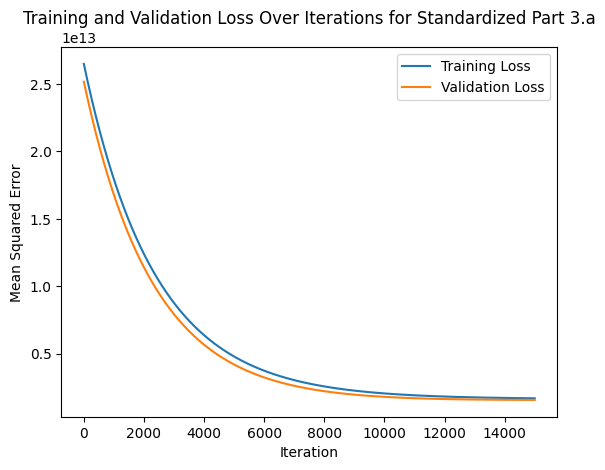

In [66]:
vars_3a_train_stand = np.c_[np.ones((train_len, 1)), train_stand_a[vars_1a]]
vars_3a_test_stand = np.c_[np.ones((test_len, 1)), test_stand_a[vars_1a]]
#print(vars_3a_train_stand[:5])

theta_3a_s = np.zeros(6)

iterations_3a_s = 15000
alpha_3a_s = 0.0001
inputs_a = 5
pen_par = 0.00000001

# Doing the gradient descent for standardized inputs from part 1.a
train_losses_3as, val_losses_3as = gradient_descent_penalty(vars_3a_train_stand, vars_3a_test_stand, price_train, price_test, alpha_3a_s, theta_3a_s, iterations_3a_s, pen_par, inputs_a)

# Linear model
print('\n The final theta values for the linear model are the following', theta_3a_s)
print('\n')

# 4. Plot the training and validation loss after each iteration for standardized part 1.a
plt.plot(train_losses_3as, label="Training Loss")
plt.plot(val_losses_3as, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations for Standardized Part 3.a")
plt.show()